In [85]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 283 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 18.2 MB/s eta 0:00:01


# Pandas
Pandas is a Python library focused on data manipulation and analysis. It can be seen as an extension of NumPy, and is based on the NumPy `ndarray`, `dtype` and corresponding functionalities. Pandas offers data structures and operations for manipulating tabular data and time series. Pandas introduces 2 new data structure - `Series` and `DataFrame`. 

## Series
The `Series` structure is similar to the 1-dimensional NumPy array, with the addition of an *index* attribute. It can be created from `list`s, `ndarray`s and similar objects. As with `ndarray`, all items must be of the same `dtype`.

In [2]:
simple_series = pd.Series(list("abcdefg"))
print(simple_series)

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object


*Note: by default, a `Series` is given an index of sequential numbers starting from 0*

In [3]:
print(simple_series.index)
print(simple_series.values)

RangeIndex(start=0, stop=7, step=1)
['a' 'b' 'c' 'd' 'e' 'f' 'g']


### `Series` index

##### Accesing `Series` by index

In [4]:
simple_series[0]
simple_series[2:5]

2    c
3    d
4    e
dtype: object

##### Manual `Series` index

In [5]:
indexed_series = pd.Series(np.linspace(0.,2.,9), index = list('abcdefghi'))
print(indexed_series)

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
i    2.00
dtype: float64


In [6]:
print("indexed_series['b']:",indexed_series['b'])
print("indexed_series[1]:",indexed_series[1])
print("indexed_series['c':'h']:\n",indexed_series['c':'h'])
print("indexed_series[3:8]:\n",indexed_series[2:7])


indexed_series['b']: 0.25
indexed_series[1]: 0.25
indexed_series['c':'h']:
 c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
dtype: float64
indexed_series[3:8]:
 c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
dtype: float64


In [7]:
indexed_series.index = [i for i in range(0,18,2)]
print(indexed_series)

0     0.00
2     0.25
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [8]:
print("indexed_series[0]:",indexed_series[0])
print("indexed_series[2]:",indexed_series[2])
print("indexed_series[2:7]:\n",indexed_series[2:7])

indexed_series[0]: 0.0
indexed_series[2]: 0.25
indexed_series[2:7]:
 4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
dtype: float64


In [9]:
#print("indexed_series[1]:",indexed_series[1])

*Accessing `Series` elements using the square brackets `[]` operator can be confusing and inconsistent when the index is not a sequential range. Use `loc` and `iloc` instead.*

In [10]:
print(indexed_series.loc[2]) #access by Series index (index location)
print(indexed_series.iloc[2]) #acces by Series item number (integer location)

0.25
0.5


In [11]:
print(indexed_series.loc[2:8]) 
print(indexed_series.iloc[2:8]) 

2    0.25
4    0.50
6    0.75
8    1.00
dtype: float64
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
dtype: float64


In [12]:
indexed_series.loc[0] = -1
print(indexed_series)

0    -1.00
2     0.25
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [13]:
indexed_series.loc[2:4] = -2
print(indexed_series)

0    -1.00
2    -2.00
4    -2.00
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [14]:
indexed_series.loc[6:12] = [0,0.25,.75,1]
print(indexed_series)

0    -1.00
2    -2.00
4    -2.00
6     0.00
8     0.25
10    0.75
12    1.00
14    1.75
16    2.00
dtype: float64


In [15]:
ascii_series = pd.Series({"a":97, "b":98,"c":99,"d":100,"A":65, "B":66,"C":67,"D":68})
print(ascii_series)

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
dtype: int64


In [16]:
ascii_series.loc['E'] = 69
ascii_series.loc['e'] = 101
print(ascii_series)

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
dtype: int64


In [17]:
expanded_series = pd.Series({"f":102, "g":103,"h":104,"i":105,"F":70, "G":71,"H":72,"I":73})
ascii_series = ascii_series.append(expanded_series)
print(ascii_series)
print("******")
print(ascii_series.loc['a':'f'])

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
f    102
g    103
h    104
i    105
F     70
G     71
H     72
I     73
dtype: int64
******
a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
f    102
dtype: int64


In [18]:
ascii_series.sort_index(inplace=True)
print(ascii_series)
print("******")
print(ascii_series.loc['a':'f'])

A     65
B     66
C     67
D     68
E     69
F     70
G     71
H     72
I     73
a     97
b     98
c     99
d    100
e    101
f    102
g    103
h    104
i    105
dtype: int64
******
a     97
b     98
c     99
d    100
e    101
f    102
dtype: int64


# DataFrame
The Pandas `DataFrame` is used to hold tabular data (tables, similar to SQL or Excel). It can be seen as a 2-dimensional `ndarray` where the columns are an ordered sequence of aligned `Series` objects (sharing the same index). It can also be seen as a specialized version of the Python `dict` object, where the keys are column names and values are the `Series` mapped to each name.

In [19]:
unicode_series = pd.Series(dict(zip(list("ABCDEFGHIabcdefghi"),[i for i in range(41,50)]+[i for i in range(61,70)])))
print(unicode_series)

A    41
B    42
C    43
D    44
E    45
F    46
G    47
H    48
I    49
a    61
b    62
c    63
d    64
e    65
f    66
g    67
h    68
i    69
dtype: int64


In [20]:
df = pd.DataFrame({'ascii':ascii_series,'unicode':unicode_series})
df

,ascii,unicode
A,65,41
B,66,42
C,67,43
D,68,44
E,69,45
F,70,46
G,71,47
H,72,48
I,73,49
a,97,61


In [21]:
print(df.index)
print(df.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i'],
      dtype='object')
Index(['ascii', 'unicode'], dtype='object')


##### Accessing a DataFrame

In [22]:
df['ascii'] #index by columns

A     65
B     66
C     67
D     68
E     69
F     70
G     71
H     72
I     73
a     97
b     98
c     99
d    100
e    101
f    102
g    103
h    104
i    105
Name: ascii, dtype: int64

In [23]:
df.unicode #columns as attributes

A    41
B    42
C    43
D    44
E    45
F    46
G    47
H    48
I    49
a    61
b    62
c    63
d    64
e    65
f    66
g    67
h    68
i    69
Name: unicode, dtype: int64

*Note: accessing via attribute method can be dangerous if the column name corresponds to an existing attribute or function of the DataFrame object. In this case, the object's attribute will be returned (or modified!) instead of the column. It is safest to use the indexing access method.*

In [24]:
df.values

array([[ 65,  41],
       [ 66,  42],
       [ 67,  43],
       [ 68,  44],
       [ 69,  45],
       [ 70,  46],
       [ 71,  47],
       [ 72,  48],
       [ 73,  49],
       [ 97,  61],
       [ 98,  62],
       [ 99,  63],
       [100,  64],
       [101,  65],
       [102,  66],
       [103,  67],
       [104,  68],
       [105,  69]])

In [25]:
df["A":"a"] #despite indexing by columns, slicing is done by index

,ascii,unicode
A,65,41
B,66,42
C,67,43
D,68,44
E,69,45
F,70,46
G,71,47
H,72,48
I,73,49
a,97,61


In [26]:
df[0:9] # or slice by row number

,ascii,unicode
A,65,41
B,66,42
C,67,43
D,68,44
E,69,45
F,70,46
G,71,47
H,72,48
I,73,49


In [27]:
df[df.ascii > 70]

,ascii,unicode
G,71,47
H,72,48
I,73,49
a,97,61
b,98,62
c,99,63
d,100,64
e,101,65
f,102,66
g,103,67


In [28]:
print(df.ascii > 70)
print (type(df.ascii > 70))

A    False
B    False
C    False
D    False
E    False
F    False
G     True
H     True
I     True
a     True
b     True
c     True
d     True
e     True
f     True
g     True
h     True
i     True
Name: ascii, dtype: bool
<class 'pandas.core.series.Series'>


###### Boolean operators on DataFrame columns create a `Series` of boolean values, mapping DF indices to the results of the boolean test.

### DateFrame Views

In [29]:
df.T # transposed view

,A,B,C,D,E,F,G,H,I,a,b,c,d,e,f,g,h,i
ascii,65,66,67,68,69,70,71,72,73,97,98,99,100,101,102,103,104,105
unicode,41,42,43,44,45,46,47,48,49,61,62,63,64,65,66,67,68,69


*Note: as with NumPy arrays, some functions for Series and DataFrames return a reference (view), and some return a copy. Modifying views will modify the original object.*

In [30]:
print(df.head())
print(df.tail())

   ascii  unicode
A     65       41
B     66       42
C     67       43
D     68       44
E     69       45
   ascii  unicode
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


In [31]:
head = df.head()
head['ascii']['A'] = 0
print(df)

   ascii  unicode
A      0       41
B     66       42
C     67       43
D     68       44
E     69       45
F     70       46
G     71       47
H     72       48
I     73       49
a     97       61
b     98       62
c     99       63
d    100       64
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
df.T['A']['ascii'] = 65
print(df)

   ascii  unicode
A     65       41
B     66       42
C     67       43
D     68       44
E     69       45
F     70       46
G     71       47
H     72       48
I     73       49
a     97       61
b     98       62
c     99       63
d    100       64
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


In [33]:
df['lower'] = df.index.str.lower()
print(df.head())

   ascii  unicode lower
A     65       41     a
B     66       42     b
C     67       43     c
D     68       44     d
E     69       45     e


In [34]:
df['order'] = df['lower'].apply(ord) - ord('a') + 1
print(df)

   ascii  unicode lower  order
A     65       41     a      1
B     66       42     b      2
C     67       43     c      3
D     68       44     d      4
E     69       45     e      5
F     70       46     f      6
G     71       47     g      7
H     72       48     h      8
I     73       49     i      9
a     97       61     a      1
b     98       62     b      2
c     99       63     c      3
d    100       64     d      4
e    101       65     e      5
f    102       66     f      6
g    103       67     g      7
h    104       68     h      8
i    105       69     i      9


In [35]:
df.drop('lower',1,inplace=True)
print(df)

   ascii  unicode  order
A     65       41      1
B     66       42      2
C     67       43      3
D     68       44      4
E     69       45      5
F     70       46      6
G     71       47      7
H     72       48      8
I     73       49      9
a     97       61      1
b     98       62      2
c     99       63      3
d    100       64      4
e    101       65      5
f    102       66      6
g    103       67      7
h    104       68      8
i    105       69      9


### `loc` and `iloc` in DataFrames
In `DataFrame`s, the `loc` and `iloc` access by index and sequence number respectively. The accessor accepts 2 indicers, the first being the row and the second being the column.

In [36]:
df.loc['A','ascii']

65

In [37]:
df.loc['A',['ascii','order']]

ascii    65
order     1
Name: A, dtype: int64

In [38]:
df.loc['A':'E',['ascii','order']]

,ascii,order
A,65,1
B,66,2
C,67,3
D,68,4
E,69,5


In [39]:
df.iloc[1,2] # row 1, column 2

2

In [40]:
df.iloc[6:,-1] # row 6:end, last column

G    7
H    8
I    9
a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
i    9
Name: order, dtype: int64

In [41]:
df.iloc[1:4,1:3] #row 1-3, column 1-2

,unicode,order
B,42,2
C,43,3
D,44,4


# Working Example - Sea Ice

In [42]:
sea_ice = pd.read_csv('sea-ice-fixed.csv',index_col='Date') # explicitly define column as index
sea_ice.head()

,Dataset,hemisphere,Extent
Date,,,
1978-10-26 00:00:00,nsidc0051,north,10.231
1978-10-28 00:00:00,nsidc0051,north,10.420
1978-10-30 00:00:00,nsidc0051,north,10.557
1978-11-01 00:00:00,nsidc0051,north,10.670
1978-11-03 00:00:00,nsidc0051,north,10.777


In [43]:
sea_ice.index = pd.to_datetime(sea_ice.index)
sea_ice.head()

,Dataset,hemisphere,Extent
Date,,,
1978-10-26,nsidc0051,north,10.231
1978-10-28,nsidc0051,north,10.420
1978-10-30,nsidc0051,north,10.557
1978-11-01,nsidc0051,north,10.670
1978-11-03,nsidc0051,north,10.777


In [44]:
sea_ice[sea_ice.index > '1980'].head(10)

,Dataset,hemisphere,Extent
Date,,,
1980-01-03,nsidc0051,north,14.302
1980-01-05,nsidc0051,north,14.414
1980-01-07,nsidc0051,north,14.518
1980-01-09,nsidc0051,north,14.594
1980-01-11,nsidc0051,north,14.665
1980-01-13,nsidc0051,north,14.771
1980-01-15,nsidc0051,north,14.831
1980-01-17,nsidc0051,north,14.957
1980-01-19,nsidc0051,north,15.120


hemisphere
north    AxesSubplot(0.125,0.2;0.775x0.68)
south    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

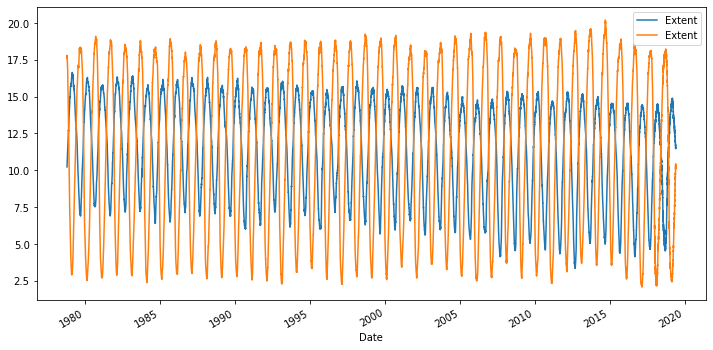

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
sea_ice.groupby('hemisphere').plot(ax=ax)

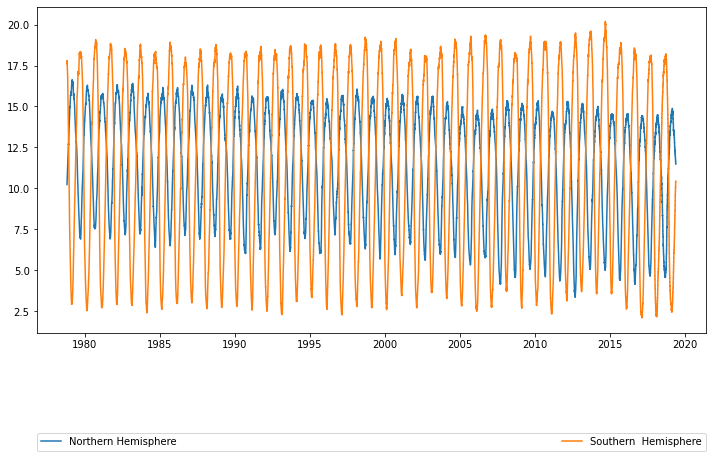

In [46]:
fig=plt.figure(figsize=(12, 6))
north = sea_ice[sea_ice.hemisphere == "north"]
south = sea_ice[sea_ice.hemisphere == "south"]
plt.plot(north.index,north.Extent,label='Northern Hemisphere')
plt.plot(south.index,south.Extent,label='Southern  Hemisphere')
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)

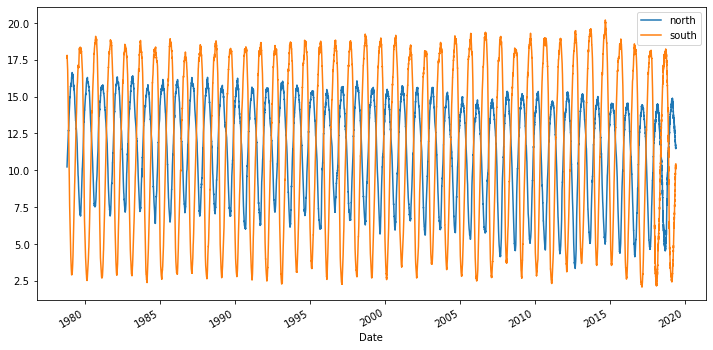

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice.groupby('hemisphere'):
    group.plot(y="Extent", ax=ax, label=name)

#### Resampling
When using a datetime index we can "resample" the data over a time period. This allows us to aggregate the data by days, months, years or even minutes and seconds (if we have that level of resolution).

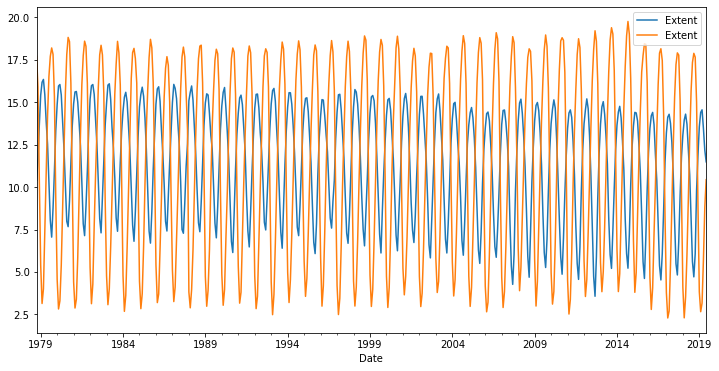

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice.groupby('hemisphere'):
    group.resample('1M').mean().plot(y="Extent", ax=ax)

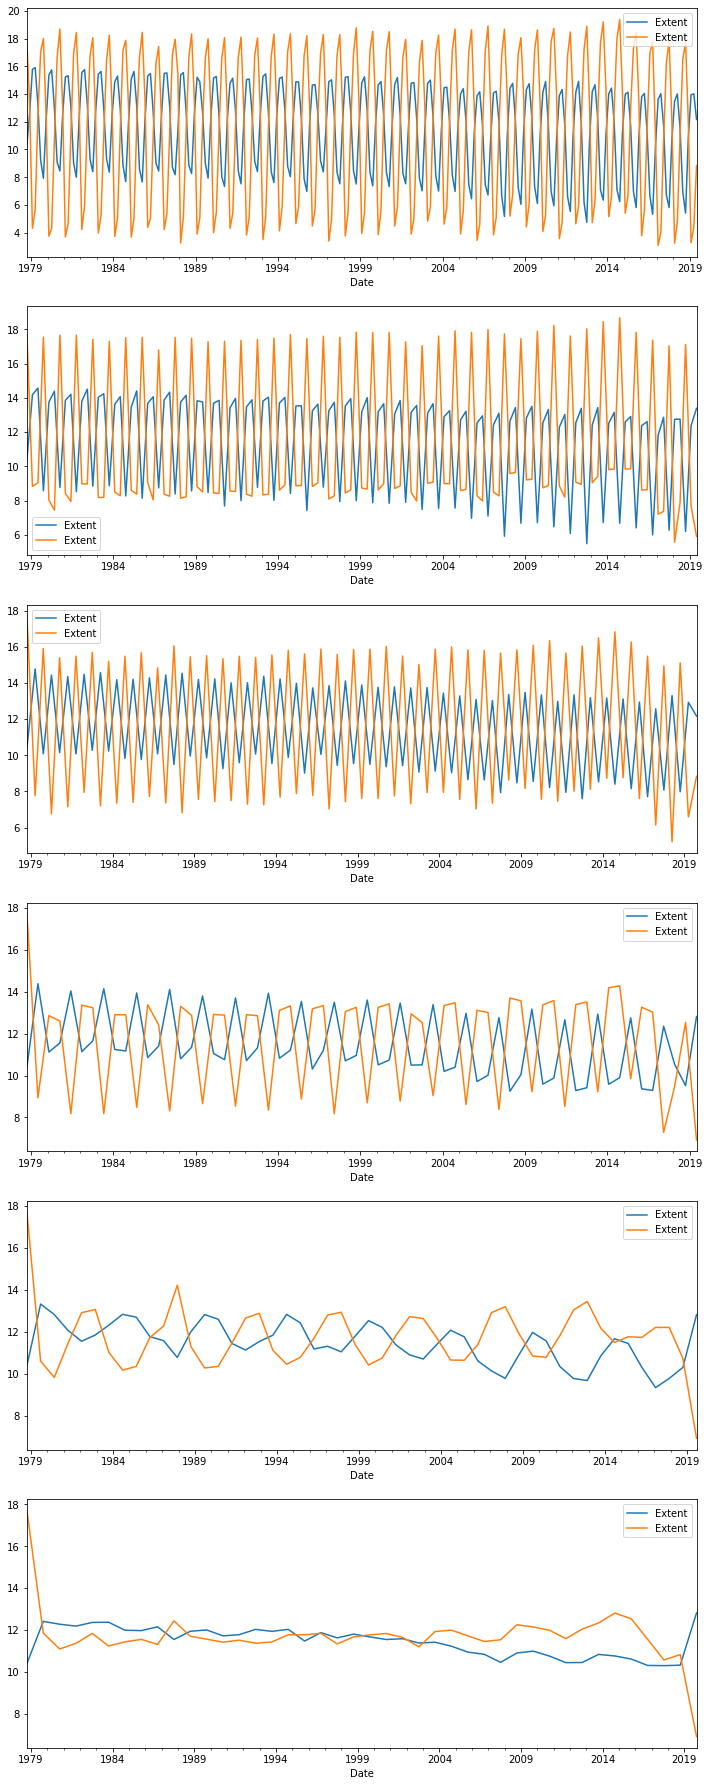

In [49]:
fig, axs = plt.subplots(6,1,figsize=(12,32))
for name, group in sea_ice.groupby('hemisphere'):
    for i in range(1,7):
        group.resample(str(i*2)+'M').mean().plot(y="Extent", ax=axs[i-1])

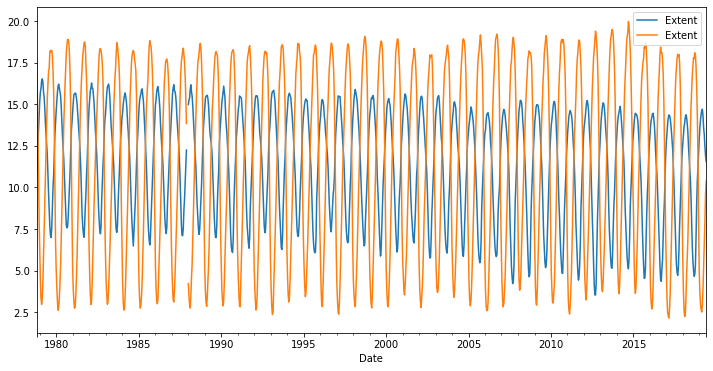

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice.groupby('hemisphere'):
    group.resample('14D').mean().plot(y="Extent", ax=ax)

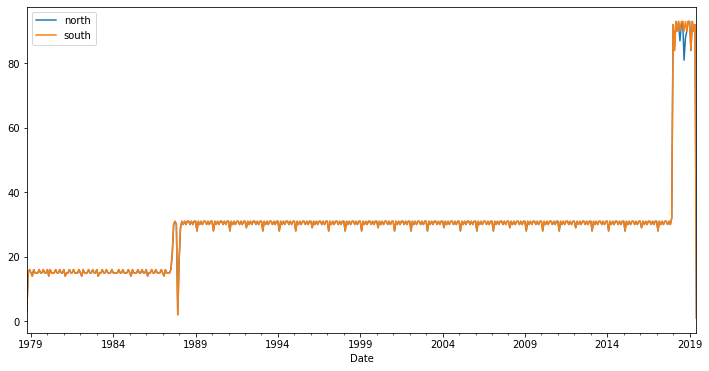

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice.groupby('hemisphere'):
    group.resample('1M').count().plot(y="Extent", ax=ax, label=name)

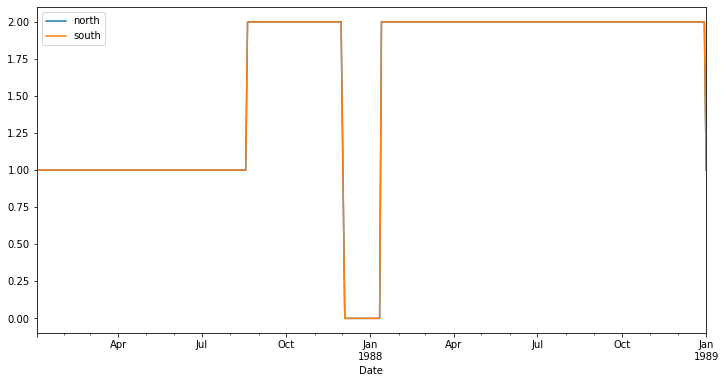

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice[(sea_ice.index <= '1989') & (sea_ice.index >= '1987')].groupby('hemisphere'):
    group.resample('2D').count().plot(y="Extent", ax=ax, label=name)

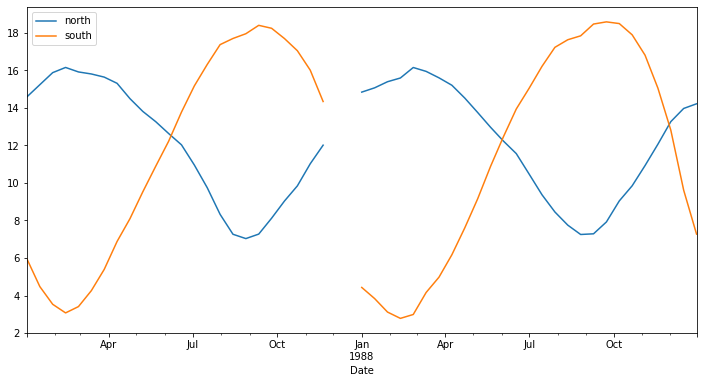

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice[(sea_ice.index <= '1989') & (sea_ice.index >= '1987')].groupby('hemisphere'):
    group.resample('14D').mean().plot(y="Extent", ax=ax, label=name)

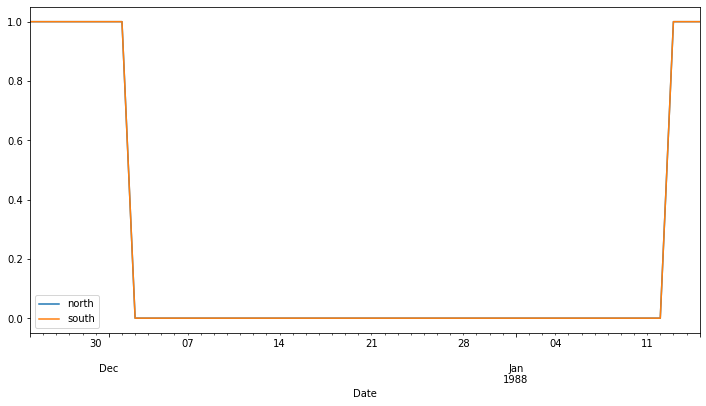

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
for name, group in sea_ice[(sea_ice.index <= '1988-01-15') & (sea_ice.index >= '1987-11-25')].groupby('hemisphere'):
    group.resample('1D').count().plot(y="Extent", ax=ax, label=name)

In [55]:
sea_ice[(sea_ice.index <= '1988-01-13') & (sea_ice.index >= '1987-12-02')]

,Dataset,hemisphere,Extent
Date,,,
1987-12-02,nsidc0051,north,12.584
1988-01-13,nsidc0051,north,14.826
1987-12-02,nsidc0051,south,13.311
1988-01-13,nsidc0051,south,4.450


##### Grouping by multiple columns

In [56]:
monthly = sea_ice.groupby(["hemisphere",sea_ice.index.month])
mon_mean = monthly.mean()
mon_mean

Extent
hemisphere Date           
north      1     14.090466
           2     14.958877
           3     15.128740
           4     14.392014
           5     12.985957
           6     11.477053
           7      9.043489
           8      6.721836
           9      5.931202
           10     7.839134
           11    10.414681
           12    12.597025
south      1      4.896593
           2      3.012059
           3      3.969735
           4      6.774857
           5     10.089448
           6     13.401377
           7     16.016353
           8     17.768529
           9     18.507845
           10    18.132551
           11    15.812069
           12    10.315254

In [57]:
mon_mean.index

MultiIndex([('north',  1),
            ('north',  2),
            ('north',  3),
            ('north',  4),
            ('north',  5),
            ('north',  6),
            ('north',  7),
            ('north',  8),
            ('north',  9),
            ('north', 10),
            ('north', 11),
            ('north', 12),
            ('south',  1),
            ('south',  2),
            ('south',  3),
            ('south',  4),
            ('south',  5),
            ('south',  6),
            ('south',  7),
            ('south',  8),
            ('south',  9),
            ('south', 10),
            ('south', 11),
            ('south', 12)],
           names=['hemisphere', 'Date'])

In [58]:
mon_mean.loc['north']

,Extent
Date,
1,14.090466
2,14.958877
3,15.128740
4,14.392014
5,12.985957
6,11.477053
7,9.043489
8,6.721836
9,5.931202


In [59]:
mon_mean.loc[("north",3):("south",3)]

Extent
hemisphere Date           
north      3     15.128740
           4     14.392014
           5     12.985957
           6     11.477053
           7      9.043489
           8      6.721836
           9      5.931202
           10     7.839134
           11    10.414681
           12    12.597025
south      1      4.896593
           2      3.012059
           3      3.969735

In [60]:
for name, group in mon_mean.groupby("hemisphere"):
        print(group)

                    Extent
hemisphere Date           
north      1     14.090466
           2     14.958877
           3     15.128740
           4     14.392014
           5     12.985957
           6     11.477053
           7      9.043489
           8      6.721836
           9      5.931202
           10     7.839134
           11    10.414681
           12    12.597025
                    Extent
hemisphere Date           
south      1      4.896593
           2      3.012059
           3      3.969735
           4      6.774857
           5     10.089448
           6     13.401377
           7     16.016353
           8     17.768529
           9     18.507845
           10    18.132551
           11    15.812069
           12    10.315254


In [61]:
mon_mean.unstack(level=0)

Extent           
hemisphere      north      south
Date                            
1           14.090466   4.896593
2           14.958877   3.012059
3           15.128740   3.969735
4           14.392014   6.774857
5           12.985957  10.089448
6           11.477053  13.401377
7            9.043489  16.016353
8            6.721836  17.768529
9            5.931202  18.507845
10           7.839134  18.132551
11          10.414681  15.812069
12          12.597025  10.315254

###### This effectively gives us a pivot table

<AxesSubplot:xlabel='Date'>

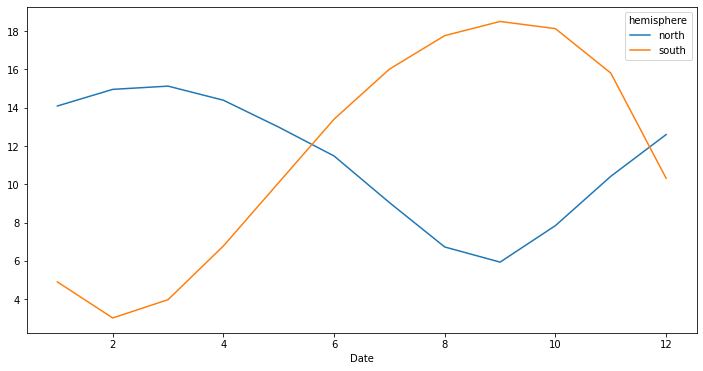

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
mon_mean.unstack(level=0)['Extent'].plot(ax=ax)

### Pivot Tables

In [69]:
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pclass = socia-economic status (upper/middle/lower)
* SibSp = # of siblings/spouses on board
* Parch = # of parents/children on board
* Embarked = port of embarkation, Cherbourgh,Queenstown or southampton

In [70]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
6,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,1,male,54.0,0,0,51.8625,E46,S
8,0,3,male,2.0,3,1,21.0750,NaN,S
9,1,3,female,27.0,0,2,11.1333,NaN,S


In [71]:
titanic.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
882,0,3,male,33.0,0,0,7.8958,NaN,S
883,0,3,female,22.0,0,0,10.5167,NaN,S
884,0,2,male,28.0,0,0,10.5000,NaN,S
885,0,3,male,25.0,0,0,7.0500,NaN,S
886,0,3,female,39.0,0,5,29.1250,NaN,Q
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S
890,1,1,male,26.0,0,0,30.0000,C148,C


##### Let's look at survival status with regards to gender, using groupby

In [73]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


###### This is useful, and already grants some insight, but let's dive deeper and also examine passenger class

In [75]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


*As we can see this is a very useful method for understanding the data, but the syntax can get quite cumbersome. This is where the pivot table comes in handy.*

In [76]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')
# Survived is the column to aggregate, by default aggregation is done using the 'mean' function.
# columns defines which columns will be the grouper

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [83]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass', margins=True)


Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [77]:
age = pd.cut(titanic['Age'], [0, 18, 80]) # cut gives us a distribution of numeric values into bins
titanic.pivot_table('Survived', ['Sex', age], 'Pclass') # multi index

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [78]:
fare = pd.qcut(titanic['Fare'], 2)
titanic.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [79]:
fare4 = pd.qcut(titanic['Fare'], 4)
titanic.pivot_table('Survived', ['Sex', age], [fare4, 'Pclass'],aggfunc='sum')

Fare            (-0.001, 7.91]       (7.91, 14.454]       (14.454, 31.0]  \
Pclass                       1     3              2     3              1   
Sex    Age                                                                 
female (0, 18]             NaN   5.0            3.0  10.0            NaN   
       (18, 80]            NaN   9.0           22.0   7.0            7.0   
male   (0, 18]             NaN   0.0            0.0   6.0            NaN   
       (18, 80]            0.0  11.0            5.0  11.0           16.0   

Fare                       (31.0, 512.329]            
Pclass              2    3               1    2    3  
Sex    Age                                            
female (0, 18]    8.0  6.0            10.0  3.0  1.0  
       (18, 80]  27.0  8.0            65.0  5.0  1.0  
male   (0, 18]    6.0  4.0             4.0  3.0  1.0  
       (18, 80]   1.0  2.0            20.0  0.0  3.0

*We can also choose which aggregation functions are used for each column*

In [82]:
titanic.pivot_table(index='Sex', columns='Pclass',
                    aggfunc={'Survived':sum, 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [88]:
corr=titanic.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

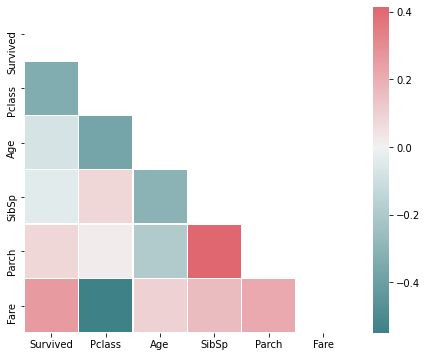

In [117]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

#### One-Hot Encoding
One-Hot encoding takes categorical data and transforms it into a boolean vector, where each value in the vector will be 0, except for the one representing the category index of the data.
For example, if we have a categorical feature with values [red,blue,green] we can transform it into 3 numerical features, red, blue and green, and each entity will be marked with a '1' in the corresponding column, and 0 in the others. In `Pandas` this is done using the `get_dummies()` function.

In [101]:
pd.get_dummies(titanic['Sex'])

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [139]:
titanic_oh = pd.concat([titanic,pd.get_dummies(titanic['Sex'])],axis=1)
titanic_oh.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,0,1
2,1,1,female,38.0,1,0,71.2833,C85,C,1,0
3,1,3,female,26.0,0,0,7.9250,NaN,S,1,0
4,1,1,female,35.0,1,0,53.1000,C123,S,1,0
5,0,3,male,35.0,0,0,8.0500,NaN,S,0,1
6,0,3,male,NaN,0,0,8.4583,NaN,Q,0,1
7,0,1,male,54.0,0,0,51.8625,E46,S,0,1
8,0,3,male,2.0,3,1,21.0750,NaN,S,0,1
9,1,3,female,27.0,0,2,11.1333,NaN,S,1,0


In [140]:
titanic_oh = pd.concat([titanic_oh,pd.get_dummies(titanic['Embarked'])],axis=1)
titanic_oh.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,0,1,0,0,1
2,1,1,female,38.0,1,0,71.2833,C85,C,1,0,1,0,0
3,1,3,female,26.0,0,0,7.9250,NaN,S,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,NaN,S,0,1,0,0,1
6,0,3,male,NaN,0,0,8.4583,NaN,Q,0,1,0,1,0
7,0,1,male,54.0,0,0,51.8625,E46,S,0,1,0,0,1
8,0,3,male,2.0,3,1,21.0750,NaN,S,0,1,0,0,1
9,1,3,female,27.0,0,2,11.1333,NaN,S,1,0,0,0,1


In [141]:
corr_oh = titanic_oh.corr()
corr_oh

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


<AxesSubplot:>

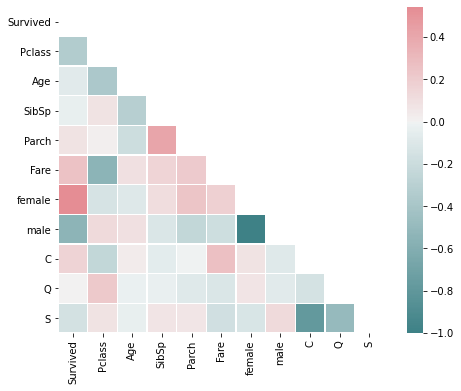

In [142]:
mask = np.triu(np.ones_like(corr_oh, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_oh, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [143]:
titanic_oh["Cabin"]

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [144]:
titanic_oh["Cabin"].dropna()

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

In [145]:
titanic_oh["Cabin"].dropna().str[0]

PassengerId
2      C
4      C
7      E
11     G
12     C
      ..
872    D
873    B
880    C
888    B
890    C
Name: Cabin, Length: 204, dtype: object

In [146]:
np.unique(titanic_oh["Cabin"].dropna().str[0])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [147]:
titanic_oh["Deck"] = titanic_oh["Cabin"].dropna().str[0]
titanic_oh.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S,Deck
PassengerId,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,0,1,0,0,1,NaN
2,1,1,female,38.0,1,0,71.2833,C85,C,1,0,1,0,0,C
3,1,3,female,26.0,0,0,7.9250,NaN,S,1,0,0,0,1,NaN
4,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0,0,1,C
5,0,3,male,35.0,0,0,8.0500,NaN,S,0,1,0,0,1,NaN


In [149]:
titanic_oh = pd.concat([titanic_oh,pd.get_dummies(titanic_oh['Deck'],prefix="D")],axis=1)
corr_oh = titanic_oh.corr()
corr_oh

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,D_A,D_B,D_C,D_D,D_E,D_F,D_G,D_T
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523,0.136309,0.093914,0.122041,0.136975,0.121440,-0.083970,-0.077296,0.039474
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224
female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722,-0.078271,0.109689,0.058649,0.079248,0.047003,0.008202,0.091031,-0.024728
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.024728
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359,0.093040,0.168642,0.113952,0.102977,-0.015939,-0.034726,-0.032371,-0.016158
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624,-0.040246,-0.072579,-0.049776,-0.060318,-0.037897,-0.004113,-0.020654,-0.010310


<AxesSubplot:>

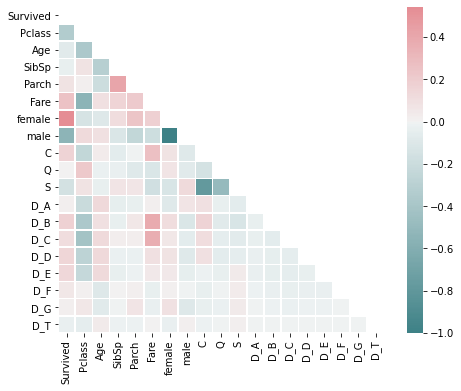

In [150]:
mask = np.triu(np.ones_like(corr_oh, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_oh, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)